In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data=pd.read_csv('heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  Heartfailure  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [168]:
data.sample(6)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
104   46   M           ASY        118          186          0     Normal   
301   55   M           ATA        140            0          0         ST   
489   54   M           ASY        136          220          0     Normal   
347   48   M           ASY        115            0          1     Normal   
351   43   M           ASY        140            0          0         ST   
412   56   M           ASY        125            0          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  Heartfailure  
104    124              N      0.0     Flat             1  
301    150              N      0.2       Up             0  
489    140              Y      3.0     Flat             1  
347    128              N      0.0     Flat             1  
351    140              Y      0.5       Up             1  
412    103              Y      1.0     Flat             1

In [169]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  Heartfailure  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Heartfailure    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [171]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Heartfailure      0
dtype: int64

In [172]:
data.shape

(918, 12)

In [173]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [174]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [175]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [176]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [177]:
#converting non-numeric data type or categorial value  into numeric

data['Sex']=data['Sex'].map({"M":0,"F":1})
data['ChestPainType']=data['ChestPainType'].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})
data['RestingECG']=data['RestingECG'].map({"Normal":0,"ST":1,"LVH":2})
data['ExerciseAngina']=data['ExerciseAngina'].map({"Y":0,"N":1})
data['ST_Slope']=data['ST_Slope'].map({"Up":0,"Flat":1,"Down":2})

data

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Heartfailure  
0      172               1      0.0         0             0  
1      156               1      1.0         1             1  
2       98               1      0.0         0             0  
3      108               0      1.5         1             1  
4      122               1      0.0         0             0  
..     ...             ...      ...       ...           ...  
913    132               1      1.2         1             1  
914    141               1      3.4         1             1  
915    115               0      1.2         1             1  
916    174               1      0.0         1             1  
917    173               1      0.0         0             0  

[918 rows x 12 columns]

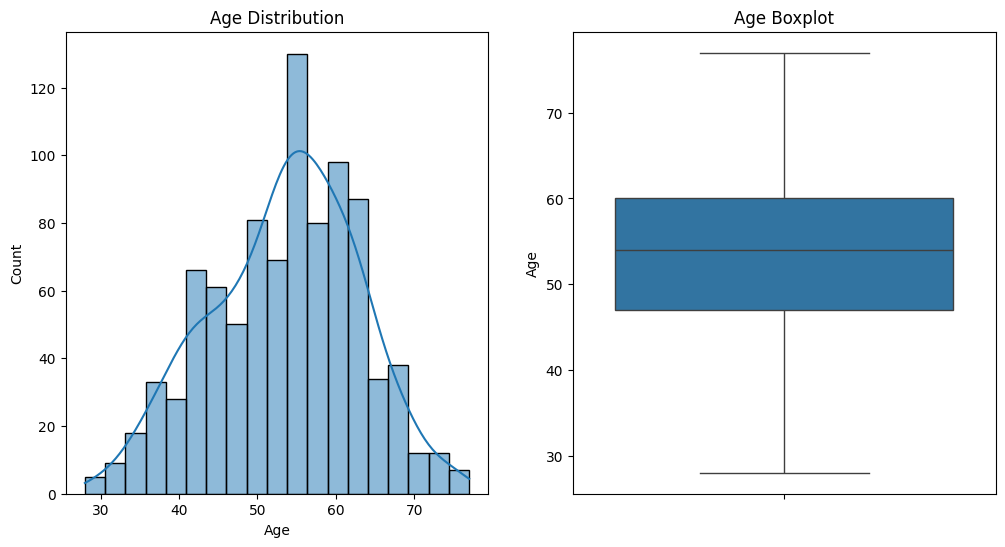

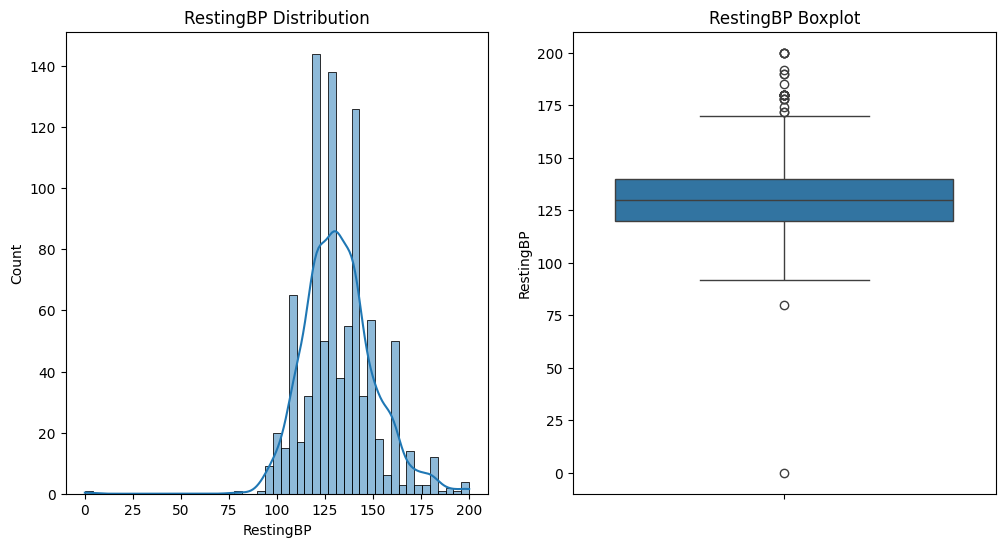

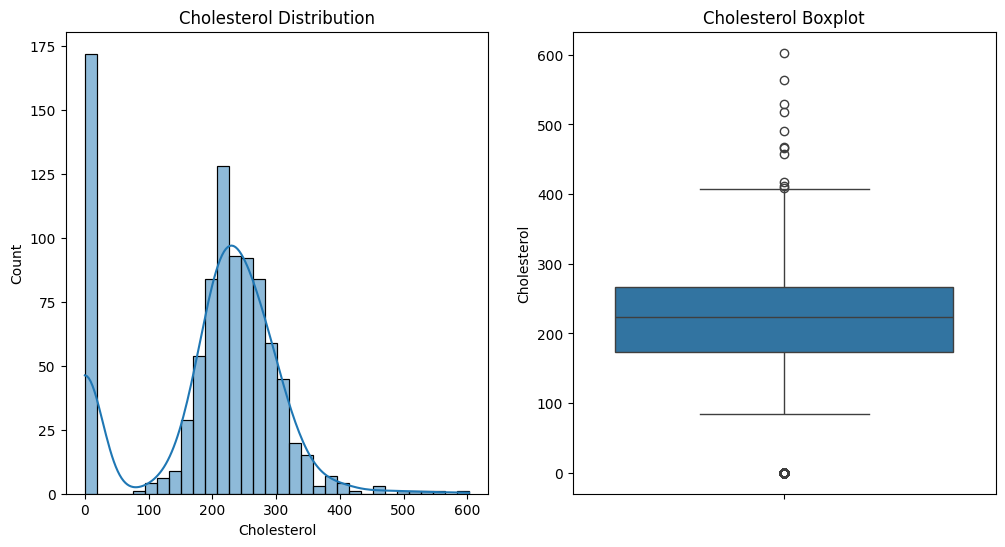

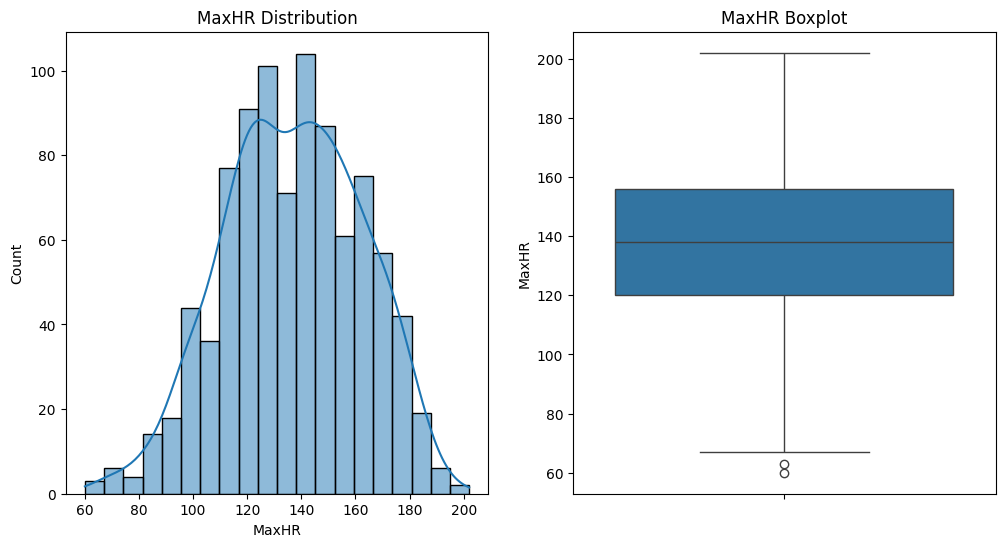

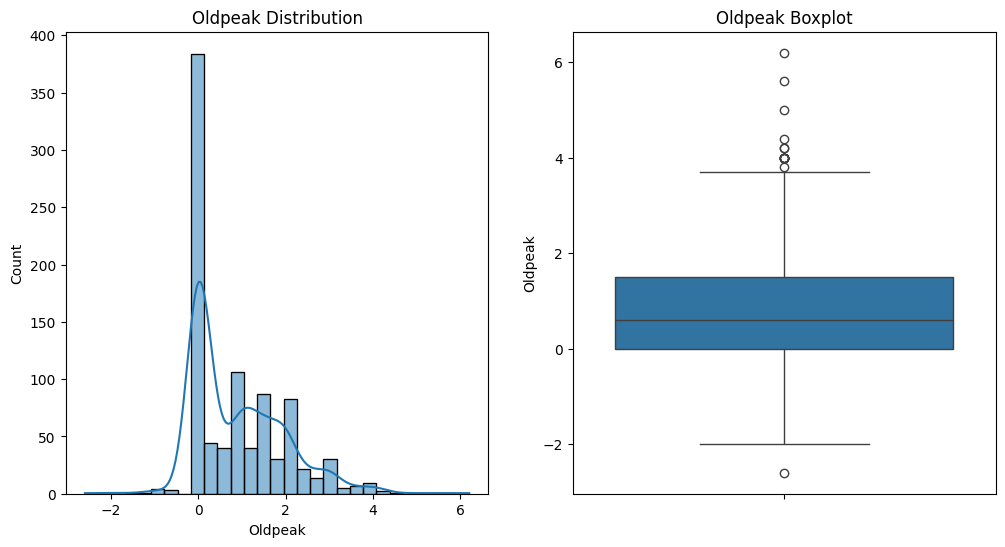

In [178]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title(f'{feature} Boxplot')
    
    plt.show()

Total No. Of Living Cases :-  410
Total No. Of Died Cases :-  508


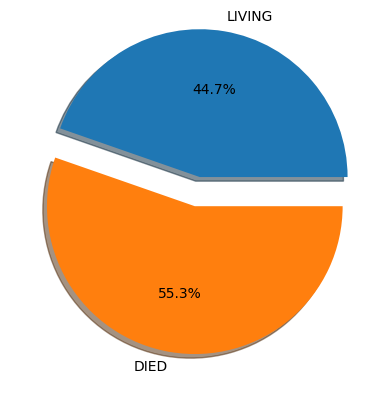

In [179]:
len_live = len(data["Heartfailure"][data.Heartfailure == 0])
len_death = len(data["Heartfailure"][data.Heartfailure == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True,autopct='%1.1f%%') 
plt.show() 




In [180]:
              
# from ydata_profiling import ProfileReport



# # Generate the profiling report
# profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

# # Display the report in a Jupyter notebook
# profile.to_notebook_iframe()

# # Or save the report to an HTML file
# profile.to_file("your_report1.html")

In [181]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [183]:
# len(x_train)
#len(x_test)
# len(y_train)
len(y_test)

184

In [184]:
#scaling the model using standard method

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

x_train

array([[-1.24506731, -0.54060477, -0.29479827, ...,  0.83846064,
        -0.09706109,  2.25746543],
       [-1.8862362 , -0.54060477, -0.29479827, ...,  0.83846064,
        -0.83628643, -1.07985506],
       [ 0.25099346, -0.54060477,  0.79803975, ..., -1.19266183,
         0.08774524,  0.58880518],
       ...,
       [ 0.67843939, -0.54060477,  0.79803975, ..., -1.19266183,
         0.45735791, -1.07985506],
       [ 0.67843939, -0.54060477,  0.79803975, ..., -1.19266183,
        -0.83628643, -1.07985506],
       [-1.45879027,  1.84978019,  0.79803975, ...,  0.83846064,
         1.01177691,  0.58880518]])

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,classification_report

regressor=LogisticRegression(   random_state=42,  
                                solver='liblinear'         #handle diffrent types of regularization
                            )                                                                                                             


regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


print("r**2 score is",r2_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))



r**2 score is 0.3523485859934459
Accuracy Score:  0.842391304347826
confusion matrix:
 [[68  9]
 [20 87]]
classification_report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [186]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=40)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("R**2 score: ",r2_score(y_test,y_pred))
print("confusion matrix\n:",confusion_matrix(y_test,y_pred))
print("classification_report\n:",classification_report(y_test,y_pred))

Accuracy score:  0.8913043478260869
R**2 score:  0.5533438524092731
confusion matrix
: [[69  8]
 [12 95]]
classification_report
:               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [187]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=60 ,random_state=42,criterion='gini',min_samples_split=4,min_samples_leaf=4)

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("R**2 score: ",r2_score(y_test,y_pred))
print("confusion matrix\n:",confusion_matrix(y_test,y_pred))
print("classification_report\n:",classification_report(y_test,y_pred))

Accuracy score:  0.8152173913043478
R**2 score:  0.2406845490957641
confusion matrix
: [[67 10]
 [24 83]]
classification_report
:               precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.89      0.78      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.82      0.82       184



In [188]:
#knn clasifier

from sklearn.neighbors import KNeighborsClassifier
k=8    
knn=KNeighborsClassifier(n_neighbors=k,leaf_size=10,metric='euclidean' )
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [189]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
                                                                                                                                                                                        
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("R*2 score:\n",r2_score(y_test,y_pred))
print("confusion matrix\n:",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy Score:  0.842391304347826
R*2 score:
 0.3523485859934459
confusion matrix
: [[69  8]
 [21 86]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.91      0.80      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [190]:
#use of hyperparameter

from sklearn.model_selection import RandomizedSearchCV
model=RandomForestClassifier()

parameter={
    'n_estimators': np.arange(1,100,5),                 # Number of trees in the forest
    'max_depth': np.arange(1,50,5),                 # Maximum depth of the tree
    'max_features': [ 'sqrt', 'log2'],            # Number of features to consider for the best split
    'criterion': ['gini', 'entropy'],
         
}

random=RandomizedSearchCV(
  model,
  parameter,
  n_iter=100,  #no of times you run the model
  cv=5,       #Cross validation folds
  n_jobs=-1   #use the cpu cores speeding up the process by running tasks in parallel. 
)

random.fit(x_train,y_train)
y_pred=random.predict(x_test)

print("best parameter used: \n",random.best_params_)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("R*2 score: ",r2_score(y_test,y_pred))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))


best parameter used: 
 {'n_estimators': 91, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'gini'}
Accuracy score:  0.8913043478260869
R*2 score:  0.5533438524092731
confusion matrix:
  [[70  7]
 [13 94]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.93      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [191]:
#use of hyperparameter grid search

from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()

parameter={
    'n_estimators': np.arange(1,50,1),                 # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],                 # Maximum depth of the tree
    'max_features': [ 'sqrt', 'log2'],            # Number of features to consider for the best split
    'criterion': ['gini', 'entropy']
         
}

grid=GridSearchCV(
  model,
  parameter,
  cv=5,       #Cross validation folds
  n_jobs=-1   #use the cpu cores speeding up the process by running tasks in parallel. 
)

grid.fit(x_train,y_train)
y_pred=grid.predict(x_test)

print("best parameter used: \n",grid.best_params_)
print("best score is:",grid.best_score_)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("R*2 score: ",r2_score(y_test,y_pred))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))


best parameter used: 
 {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 29}
best score is: 0.8773087317118629
Accuracy score:  0.8695652173913043
R*2 score:  0.46401262289112766
confusion matrix:
  [[70  7]
 [17 90]]
classification report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.84      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184



In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


model = KNeighborsClassifier()

# Define the parameter grid
parameter_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': np.arange(1, 50, 1), 
    'metric': ['euclidean', 'manhattan'], 
    'n_neighbors': [3, 5, 7, 10],
    'n_jobs': [-1, None],
    'p': [1, 2],
    'weights': ['uniform', 'distance']  
}

# Initialize GridSearchCV
gridk = GridSearchCV(
    model,
    param_grid=parameter_grid,  # Use param_grid instead of param_distributions
    cv=5,                       # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores
    
    
    
)


gridk.fit(x_train, y_train)

y_pred = gridk.predict(x_test)

# Print the best parameters and evaluation metrics
print("Best parameters used:\n", gridk.best_params_)
print("the best score is:",gridk.best_score_)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Best parameters used:
 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
the best score is: 0.871941105209207
Accuracy score:  0.842391304347826
Confusion matrix:
 [[66 11]
 [18 89]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.89      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [193]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


model = KNeighborsClassifier()


parameter_dist = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': np.arange(1, 50, 1), 
    'metric': ['euclidean', 'manhattan'], 
    'n_neighbors': [3, 5, 7, 10],  
    'n_jobs': [-1, None],
    'p': [1, 2],
    'weights': ['uniform', 'distance']  
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=parameter_dist,  # Parameter distribution
    n_iter=100,  # Number of parameter settings to sample
    cv=5,        # Cross-validation folds
    n_jobs=-1,   # Use all available CPU cores
    random_state=42  # Seed for reproducibility
)


random_search.fit(x_train, y_train)


y_pred = random_search.predict(x_test)

print("best score: ",random_search.best_score_)
print("Best parameters used:\n", random_search.best_params_)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


best score:  0.871941105209207
Best parameters used:
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'n_jobs': -1, 'metric': 'euclidean', 'leaf_size': 19, 'algorithm': 'ball_tree'}
Accuracy score:  0.842391304347826
Confusion matrix:
 [[66 11]
 [18 89]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.89      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [194]:
#cross validation

from sklearn import svm
from sklearn.model_selection import cross_val_score

clm=svm.SVC(kernel='rbf',C=5).fit(x_train,y_train)
clm.score(x_test,y_test)

scores=cross_val_score(clm,x_train,y_train,cv=5)
print(scores)
scores.mean()

[0.86394558 0.88435374 0.85034014 0.81632653 0.84931507]


0.8528562109775416

93.75
lower outlier:  32.625
upper outlier:  407.625
20.0
lower outlier:  90.0
upper outlier:  170.0
filterdata:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0    

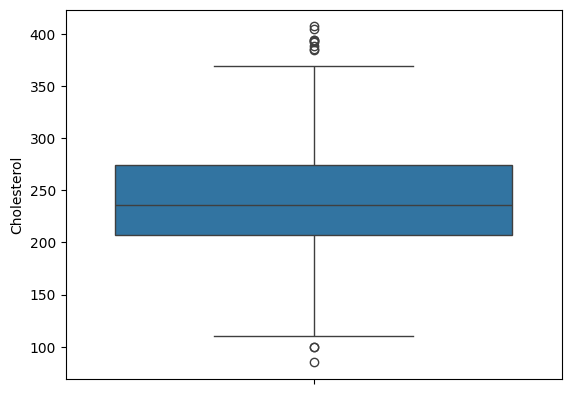

In [195]:
#outlier removing process


# sns.boxplot(data['Cholesterol'])

Q1=data['Cholesterol'].quantile(0.25)
Q3=data['Cholesterol'].quantile(0.75)

IQR=Q3-Q1
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(IQR)
print("lower outlier: ",lowerBound)
print("upper outlier: ",upperBound)

filterData=data[((data['Cholesterol'])>=lowerBound) & (data['Cholesterol']<=upperBound)]

# print("FilterDta:\n",filterData)
sns.boxplot(filterData['Cholesterol'])

Q1=filterData['RestingBP'].quantile(0.25)
Q3=filterData['RestingBP'].quantile(0.75)

IQR=Q3-Q1
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(IQR)
print("lower outlier: ",lowerBound)
print("upper outlier: ",upperBound)

filterData=filterData[((filterData['RestingBP'])>=lowerBound) & (filterData['RestingBP']<=upperBound)]
print("filterdata:\n",filterData)

# sns.boxplot(filterData['RestingBP'])


Q1=filterData['Oldpeak'].quantile(0.25)
Q3=filterData['Oldpeak'].quantile(0.75)

IQR=Q3-Q1
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(IQR)
print("lower outlier: ",lowerBound)
print("upper outlier: ",upperBound)

filterData=filterData[((filterData['Oldpeak'])>=lowerBound) & (filterData['Oldpeak']<=upperBound)]
print("filterdata:\n",filterData)

# sns.boxplot(filterData['Oldpeak'])

In [196]:


X=filterData.drop('Heartfailure',axis=1)
Y=filterData['Heartfailure']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.21,random_state=42)

param_distributions = {
    'n_estimators':[i for i in range(100,1000)],  # Number of trees in the forest
    'max_depth': [i for i in range(10,100)],       # Maximum depth of the tree
    'min_samples_split': [i for i in range(2,20)], # Minimum number of samples required to split a node
    'min_samples_leaf': [i for i in range(1,20)],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],          # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']    # Function to measure the quality of a split

}

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=RandomForestClassifier(random_state=42)

model=RandomForestClassifier(n_estimators= 300, min_samples_split= 19,
                             min_samples_leaf= 3,n_jobs=-1, max_features= 'log2', max_depth=10,criterion='gini',bootstrap=False, random_state=42)

model.fit(X_train,Y_train)

scores = cross_val_score(model, X, Y, cv=5, scoring=('accuracy'))

# Print the scores for each fold
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Y_pred=model.predict(X_test)
r2=r2_score(Y_test,Y_pred)
print("R2:",r2)
print(f"Accuracy is:{accuracy_score(Y_test,Y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(Y_test,Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test,Y_pred)}")



Cross-validation scores: [0.90070922 0.95035461 0.9        0.8        0.75714286]
Mean accuracy: 0.8616413373860181
Standard deviation: 0.07153644946676697
R2: 0.702648401826484
Accuracy is:0.9256756756756757
Confusion matrix:
[[68  7]
 [ 4 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        75
           1       0.91      0.95      0.93        73

    accuracy                           0.93       148
   macro avg       0.93      0.93      0.93       148
weighted avg       0.93      0.93      0.93       148



In [197]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(filterData, title="Pandas Profiling Report", explorative=True)

# Display the report in a Jupyter notebook
profile.to_notebook_iframe()

# Or save the report to an HTML file
profile.to_file("your_report_3.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Total No. Of Living Cases :-  377
Total No. Of Died Cases :-  325


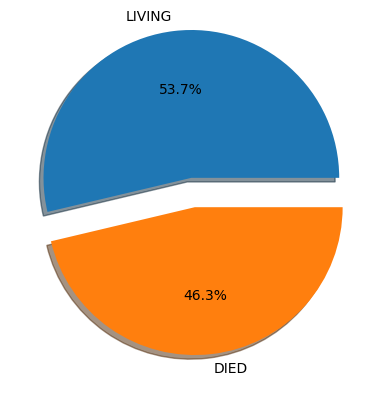

In [198]:
len_live = len(filterData["Heartfailure"][filterData.Heartfailure == 0])
len_death = len(filterData["Heartfailure"][filterData.Heartfailure == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True,autopct='%1.1f%%') 
plt.show() 


In [199]:
import streamlit as st
import pandas as pd

# Assuming the model and scaler have already been trained in previous steps

# Function to get user input and predict heart failure
def predict_heart_failure(model, scaler):
    st.title("Heart Failure Prediction")
    
    st.write("Please provide the following details for prediction:")

    # Collect user inputs using Streamlit's sidebar
    Age = st.number_input("Age", min_value=0, max_value=120, value=25)
    Sex = st.selectbox("Sex", options=[0, 1], format_func=lambda x: "Female" if x == 0 else "Male")
    ChestPainType = st.selectbox("Chest Pain Type", options=[0, 1, 2, 3], 
                                  format_func=lambda x: ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"][x])
    RestingBP = st.number_input("Resting Blood Pressure", min_value=50, max_value=200, value=120)
    Cholesterol = st.number_input("Cholesterol Level", min_value=0, max_value=600, value=200)
    FastingBS = st.selectbox("Fasting Blood Sugar", options=[0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
    RestingECG = st.selectbox("Resting ECG", options=[0, 1, 2], 
                               format_func=lambda x: ["Normal", "Abnormal", "Hypertrophy"][x])
    MaxHR = st.number_input("Maximum Heart Rate Achieved", min_value=60, max_value=220, value=100)
    ExerciseAngina = st.selectbox("Exercise Induced Angina", options=[0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
    Oldpeak = st.number_input("Oldpeak (ST Depression)", min_value=0.0, max_value=6.0, value=1.0, step=0.1)
    ST_Slope = st.selectbox("ST Slope", options=[0, 1, 2], 
                             format_func=lambda x: ["Upsloping", "Flat", "Downsloping"][x])

    # Create a DataFrame for the input values
    input_data = pd.DataFrame({
        'Age': [Age],
        'Sex': [Sex],
        'ChestPainType': [ChestPainType],
        'RestingBP': [RestingBP],
        'Cholesterol': [Cholesterol],
        'FastingBS': [FastingBS],
        'RestingECG': [RestingECG],
        'MaxHR': [MaxHR],
        'ExerciseAngina': [ExerciseAngina],
        'Oldpeak': [Oldpeak],
        'ST_Slope': [ST_Slope]
    })

    # Preprocess the input (scaling)
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction using the trained model
    if st.button("Predict"):
        prediction = model.predict(input_data_scaled)

        # Output the prediction
        if prediction[0] == 1:
            st.success("Prediction: YES, the customer is at risk of heart failure.")
        else:
            st.success("Prediction: NO, the customer is not at risk of heart failure.")

# Call the function to get input and predict
predict_heart_failure(model, scaler)


2024-10-01 01:50:49.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.521 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 01:50:49.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [200]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = GradientBoostingClassifier(random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', model1), ('lr', model2), ('gb', model3)], voting='soft')
voting_clf.fit(x_train, y_train)
y_pred=voting_clf.predict(x_test)
a=accuracy_score(y_test,y_pred)
a


0.875